# Evolutionary Algorithms

In this notebook we will develop an Evolutionary Algorithm (EA) from scratch to maximise an objective function. As we saw during class, EAs are stochastic search methods that mimic the natural evolution, inspired in Darwin's theory of evolution. These techniques use evolutionary operators such as reproduction, mutation and selection to maximise a given objective function (known as **fitness function**).


**Summary**
 - [Fitness Function](#objfun)
 - [Evolutionary Operators](#operators)
   - [Selection](#selection)
   - [Reproduction](#reproduction)
   - [Mutation](#mutation)
 - [Evolutionary Search](#algorithm)

In [2]:
%matplotlib notebook 

# Standard libraries
import numpy as np  # written in C, is a faster and robust library for numerical and matrix operations
import math as mt #provides access to the mathematical functions defined by the C standard.
import pandas as pd # data manipulation library, it is widely used for data analysis and relies on numpy library.
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # plot nicely =)

## Fitness Function
<a id='objfun'></a>

Let's first define the fitness function to be maximised by the evolutionary algorithm:

$$f(x) = \frac{\cos(\frac{1}{x})}{x}$$

In [3]:
def objfun(x):
    f=np.cos(1/x)/x
    return f

### Plotting the Fitness Function

<IPython.core.display.Javascript object>


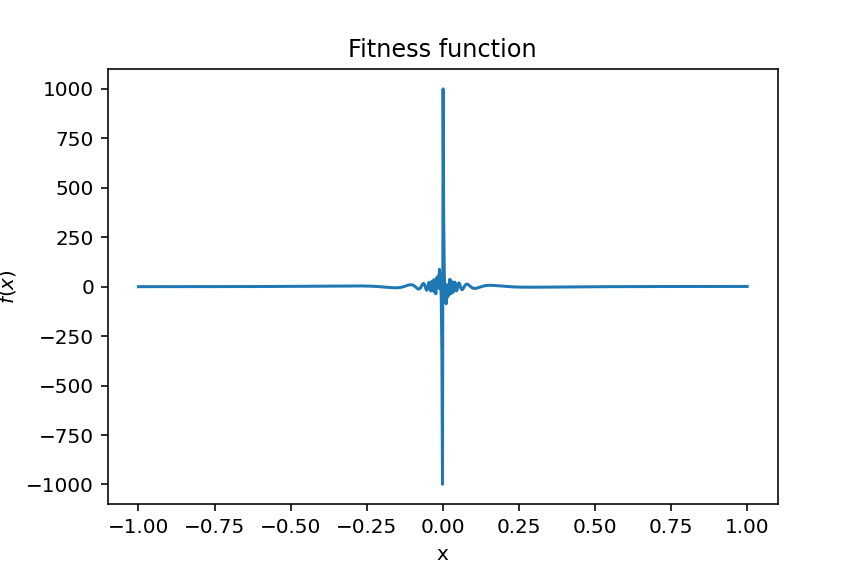

Text(0.5, 0, 'x')

In [4]:
t=np.linspace(-1,1,1000)
ft=objfun(t)

plt.plot(t,ft)
plt.title("Fitness function")
plt.ylabel('$f(x)$')
plt.xlabel('x')

## Evolutionary Operators
<a id='operators'></a>

Here we define the evolutionary operators, which are the components that perform the evolution of a population.

**Covered Operators**
 - [Selection](#selection)
 - [Reproduction](#reproduction)
 - [Mutation](#mutation)

### Selection
<a id='selection'></a>

This operator determines which individuals in the population are chosen for reproduction.

In [4]:
def selection(fitness):
    """
    Selects mum and dad for the reproduction step
    parameters:
        fitness: an array with the fitness value for each individual in the population
    return:
        mum, dad
    """
    pdf=fitness/np.sum(fitness)  #probability of each being the parent
    # fitness.shape[0] is the number of individuals in the population (aka, population size)
    (mum,dad)=np.random.choice(fitness.shape[0], 2,p=pdf)  #choose mum and dad
        
    return (mum, dad)

Sanity check

In [5]:
n = 20
parents = np.random.rand(n)
fitness = objfun(parents)

fitness = abs(fitness*(fitness>0)) #objective function fitness must be non-negative

print('parents')
print(fitness)
mum,dad = selection(fitness)
print('mum: {} (fitness: {:.5}) -  dad: {} (fitness: {:.5})'.format(mum,fitness[mum],dad,fitness[dad]))

parents
[ 0.20675683  0.36996561  0.47651545  0.          0.40654703  0.
  0.          0.31947314  0.11090721  0.         12.28169875  1.39695145
  0.          0.35926868  0.42540162  0.          0.42430857  0.
  0.          0.44352987]
mum: 4 (fitness: 0.40655) -  dad: 10 (fitness: 12.282)


### Reproduction
<a id='reproduction'></a>

Produces new individuals combining the information contained in the parents
(mum and dad).

In [6]:
def reproduction(parents, mum, dad, ngene):
    """
    Produces new individuals
    parameters:
        parents: inviduals in the population
        mum, dad: index of the parents
        ngene: coding dependent
    return:
        new individual
        chosen crossover
    """
    ggene=np.random.randint(0,ngene)    #choose crossover
    shift=2**ggene 
    kid= ( mt.floor(parents[mum]*shift) + (parents[dad]*shift)%1 ) #mum+dad
    
    return kid, ggene

Sanity check

In [7]:
ngene = 64
kid, ggene = reproduction(parents, mum, dad, ngene)
print("New spring: {:.5} - chosen crossover: {}".format(kid, ggene))

New spring: 51.154 - chosen crossover: 6


### Mutation
<a id='mutation'></a>

After reproduction every individual undergoes mutation. Mutation occurs during evolution according to a mutation probability, such probability should be set low. This step is analogous to biological mutation, and the main target is to maintain population diversity.

In [8]:
def mutation(kid, ggene, ngene, prob_mutation):
    """
    Produces new individuals
    parameters:
        kid: new individual create by reproduction step
        ggene: chosen crossover
        ngene: coding dependent
        prob_mutation: mutation probability, this should be set low.
    return:
        mutated individual
    """
    kid= mt.floor(kid* (2**(ngene-ggene))) #big kid (long-int)
    imut= int(np.sum(2**np.argwhere((np.random.rand(ngene) < prob_mutation))))
    kid= kid^imut # mutation
    kid=kid/(2**ngene) 
    
    return kid

Sanity check

In [9]:
prob_mutation=0.01
mut_kid = mutation(kid, ggene, ngene, prob_mutation)
print("NOT Mutated spring: {:.5}".format(kid))
print("Mutated spring: {:.5}".format(mut_kid))

NOT Mutated spring: 51.154
Mutated spring: 0.79928


## Evolutionary Search
<a id='algorithm'></a>

This process iteratively applies the evolutionary operators to minimise the fitness function. At each generation, new solutions are created according to their fitness, allowing the evolution of the solutions (individuals) that minimise the fitness function. The figure below illustrates the entire process of the evolutionary algorithm.

<img src="figs/ea.pdf" alt="Evolutionary Algorithm" style="width: 600px;"/>

In [10]:
np.random.seed(42)

n=1000 #population 1000
parents=np.random.rand(n)
ngen=50 #number of generations 50
ngene=64 #coding dependent - we're in a 64-bit world
gen=0
pmut=0.01 #bit-wise/gene-wise mutation rate

while gen<ngen:
    
    fit=objfun(parents)
    children=np.array([])

    for i in range(0,n): # make n children, parents are polyganous and reproduction is asexual
        
        fit=abs(fit*(fit>0)) #objective function fitness must be non-negative

        #Selection
        (mum,dad)=selection(fit)
        #Reproduction
        kid, ggene = reproduction(parents, mum, dad, ngene)
        #Mutation
        kid = mutation(kid, ggene, ngene, pmut)
        
        #add the new kid to the list of children
        children=np.append(children,kid)
        
    parents=children
    #report 
    print("Generation: ",gen," maximum fitness =",max(fit),' at ',parents[np.argmax(fit)])

    #and repeat
    gen+=1

Generation:  0  maximum fitness = 112.52504958505489  at  0.005514747282993171
Generation:  1  maximum fitness = 1307.4729899340828  at  0.26135364476671497
Generation:  2  maximum fitness = 6753.581913638761  at  0.000125083362413958
Generation:  3  maximum fitness = 8052.368451293858  at  0.0005199026667607745
Generation:  4  maximum fitness = 892328.867247451  at  1.0870196204548765e-06
Generation:  5  maximum fitness = 6464395.704643294  at  1.120485949912542e-06
Generation:  6  maximum fitness = 7204007.733383496  at  1.0832943319327715e-06
Generation:  7  maximum fitness = 18664529.11817452  at  4.7602837338839646e-08
Generation:  8  maximum fitness = 57642756.28785365  at  3.066774244459003e-05
Generation:  9  maximum fitness = 133444110.24796624  at  4.760965877093071e-08
Generation:  10  maximum fitness = 145537593.9876388  at  2.903717569169295e-08
Generation:  11  maximum fitness = 148411519.32431263  at  6.915195694279924e-09
Generation:  12  maximum fitness = 150573803.549

### Ploting the Solutions

<IPython.core.display.Javascript object>


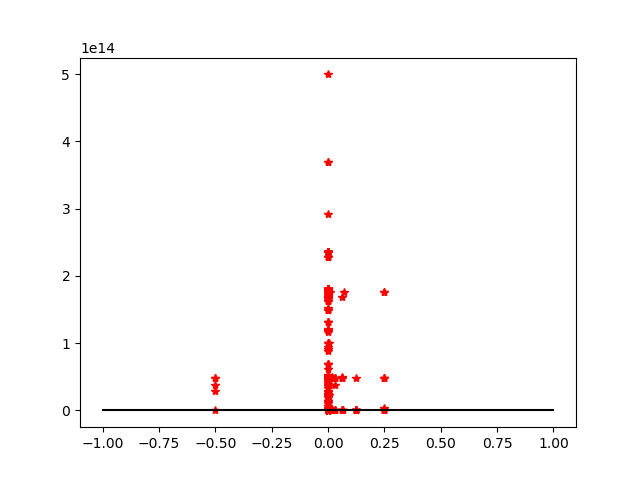

In [11]:
plt.figure()    
plt.plot(parents, fit, 'r*')
plt.plot(t,ft,'k')
plt.show()

**Your turn**

In this exercise, we propose that you try to minimise a 2D function - this is the ["Eggholder" function](https://en.wikipedia.org/wiki/Test_functions_for_optimization) (according to Wikipedia), and it is notoriously bumpy. 

**Defining the function**

In [12]:
def Eggholder(x,y):
    f=-(y+47)*np.sin(np.sqrt(np.abs(x/2+y+47)))-x*np.sin(np.sqrt(np.abs(x-y-47)))
    return f

**Visualising the "Eggholder" function **

<IPython.core.display.Javascript object>


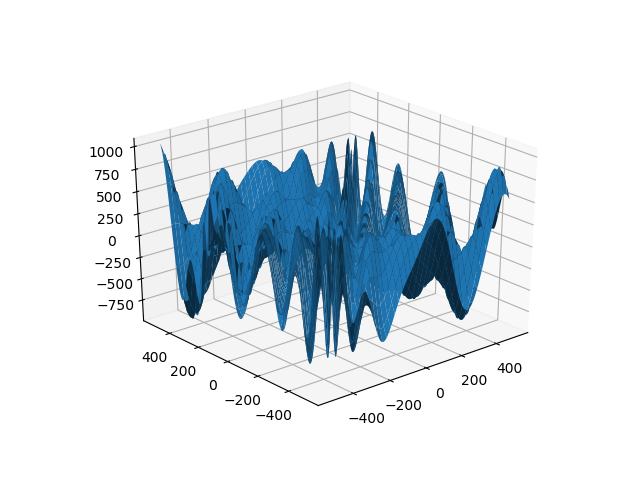

In [13]:
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = y = np.arange(-512, 512, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([Eggholder(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)